# Bank's Credit Card - Churn Prediction

In this project, I will build a machine learning model to predict customer's probability of churning in a bank's credit card service. It involves supervised learning (using a labeled training set) for classification, where the target is 1 if the customer churned, else 0.

I will use the following pipeline based on CRISP-DM framework:

1. Define the business problem.
2. Collect the data and get a general overview of it.
3. Split the data into train and test sets.
4. Explore the data (exploratory data analysis)
5. Feature engineering, data cleaning and preprocessing.
6. Model training, comparison, feature selection and tuning.
7. Final production model testing and evaluation.
8. Conclude and interpret the model results.
9. Deploy.

In this notebook, I will perform exploratory data analysis (EDA), covering steps 1 to 4 of the pipeline above. The main objective here is to uncover insights that will give us valuable information about churners' patterns within the available features. Thus, even before building a model, it will be possible to help the bank with some churners profiles and tendencies. Furthermore, I will approach these steps in detail below, explaining why I am making each decision.

# 1. Business problem


A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them how likely is a customer to churn so they can proactively go to the customers to provide them better services and turn customers' decisions in the opposite direction.

### 1.1 What is the context?

When a bank acquires a customer for its credit card service, three essential Key Performance Indicators (KPIs) to consider include:

1. Customer Acquisition Cost (CAC): This measures the expenses associated with acquiring each credit card customer, encompassing marketing, sales, and related costs. Lower CAC reflects efficient customer acquisition.

2. Customer Lifetime Value (CLV): CLV estimates the total revenue the bank can expect to generate from a credit card customer over their relationship. A higher CLV indicates that the customer's value surpasses the acquisition cost, ensuring long-term profitability.

3. Churn Rate: Churn rate is typically expressed as a percentage and represents the number of credit card customers who have left during a specific period divided by the total number of customers at the beginning of that period.

- These KPIs help the bank assess the effectiveness of its strategies in acquiring credit card customers and gauge the potential long-term financial benefit of these acquisitions.

- In order to maximize profitability, the bank aims to minimize CAC and Churn while maximizing CLV.

## Importing the Libraries

In [29]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Split the data.
from sklearn.model_selection import train_test_split

# Utils
from src.eda_utils import *

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

### Visualization Settings
%matplotlib inline

mpl.style.use('ggplot') 

mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

# Palette Setting
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33']
# Setting as the palette
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(0.00784313725490196, 0.18823529411764706, 0.2784313725490196),
 (0.9098039215686274, 0.36470588235294116, 0.01568627450980392),
 (0.0, 0.4666666666666667, 0.7137254901960784),
 (1.0, 0.5098039215686274, 0.0),
 (0.0, 0.5882352941176471, 0.7803921568627451),
 (1.0, 0.611764705882353, 0.2)]

## 2. Understanding the data

The dataset was collected from kaggle: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?sort=votes

In the dataset, it is recommend to delete the last two columns, since there is no explanation about their meaning

In [30]:
data_path = '../input/BankChurners.csv'
df = pd.read_csv(data_path)
df = df.iloc[:, :-2]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [32]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00


## Data Dictionary

**1. CLIENTNUM:** Client number. Unique identifier for the customer holding the account. Categorical nominal.


**2. Attrition_Flag:** Internal event (customer activity) variable - if the account is closed then 1 else 0. Categorical binary.


**3. Customer_Age:** Demographic variable - Customer's Age in Years. Numerical discrete.


**4. Gender:** Demographic variable - M=Male, F=Female. Categorical nominal.


**5. Dependent_count:** Demographic variable - Number of dependents. Numerical discrete.


**6. Education_Level:** Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.). Categorical ordinal.

**7. Marital_Status:** Demographic variable - Married, Single, Divorced, Unknown. Categorical nominal.

**8. Income_Category:** Demographic variable - Annual Income Category of the account holder (< 
40K - 60K, 
80K, 
120K, >.). Categorical ordinal.

**9. Card_Category:** Product Variable - Type of Card (Blue, Silver, Gold, Platinum). Categorical ordinal.

**10. Months_on_book:** Period of relationship with bank. Numerical discrete.

**11. Total_Relationship_Count:** Total no. of products held by the customer. Numerical discrete.

**12. Months_Inactive_12_mon:** No. of months inactive in the last 12 months. Numerical discrete.

**13. Contacts_Count_12_mon:** No. of Contacts in the last 12 months. Numerical discrete.

**14. Credit_Limit:** Credit Limit on the Credit Card. Numerical continuous.

**15. Total_Revolving_Bal:** Total Revolving Balance on the Credit Card. Numerical discrete.

**16. Avg_Open_To_Buy:** Open to Buy Credit Line (Average of last 12 months). Numerical continuous.

**17. Total_Amt_Chng_Q4_Q1:** Change in Transaction Amount (Q4 over Q1). Numerical continuous.

**18. Total_Trans_Amt:** Total Transaction Amount (Last 12 months). Numerical discrete.

**19. Total_Trans_Ct:** Total Transaction Count (Last 12 months). Numerical discrete.

**20. Total_Ct_Chng_Q4_Q1:** Change in Transaction Count (Q4 over Q1). Numerical continuous.

**21. Avg_Utilization_Ratio:** Average Card Utilization Ratio. Numerical continuous.

In [33]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 10127 rows and 21 columns.


In [34]:
# Set display precision
pd.set_option('display.precision', 2)

# Disable scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00,739177606.33,36903783.45,708082083.00,713036770.50,717926358.00,773143533.00,828343083.00
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00


**Some Insights:**



1. The average age is approximately 46 years. 
   
2. 
    Interquartile Range (IQR)

    IQR = Q3 - Q1 = 52 - 41 = 11
    50% of ages range from 41 to 52

    Indicating an old profile


### Checking for duplicated and/or missing values

In [35]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [36]:
df.duplicated().sum()

0

There are no missing or duplicated values

- I will drop the CLIENTNUM variable because it has an unique value for each record, not being useful for the analysis.
  
- I will rename the columns in a standard format in order to turn the data manipulation easier. Moreover, attrition_flag will be renamed as churn_flag for interpretation purposes.
  
- I will express Gender and Attrition_Flag variables as binary. This will make eda easier, like when looking at percentual values.

In [37]:
df.drop(columns=['CLIENTNUM'], inplace=True)

In [38]:
df.columns = [x.lower() for x in df.columns]

In [39]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df['attrition_flag'] = df['attrition_flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

In [40]:
df.rename(columns={'attrition_flag': 'churn_flag'}, inplace=True)

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
churn_flag,10127.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
customer_age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
gender,10127.00,0.47,0.50,0.00,0.00,0.00,1.00,1.00
dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
total_relationship_count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
months_inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
contacts_count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
credit_limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
total_revolving_bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00


We can note that there are more existing customers than attrited ones, so it is an imbalanced dataset

# 3. Split the data into train and test sets

- First of all, I will split the data into train and test sets.
- I will specify stratify=y so that the train_test_split function ensures that the splitting process maintains the same percentage of each target class in both the training and testing sets.

In [42]:
X = df.drop(columns=['churn_flag'])
y = df['churn_flag'].copy()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [44]:
print(f'Train predictor dataset shape: {X_train.shape}.')
print(f'Train target dataset shape: {y_train.shape}.')
print(f'Test predictor dataset shape: {X_test.shape}.')
print(f'Test target dataset shape: {y_test.shape}.')

Train predictor dataset shape: (8101, 19).
Train target dataset shape: (8101,).
Test predictor dataset shape: (2026, 19).
Test target dataset shape: (2026,).


In [45]:
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')

Train target proportion: 
churn_flag
0   0.84
1   0.16
Name: proportion, dtype: float64

Test target proportion: 
churn_flag
0   0.84
1   0.16
Name: proportion, dtype: float64


# 4. Exploratory data analysis

In [46]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,churn_flag
2856,36,0,0,Unknown,Married,Less than $40K,Blue,24,4,3,2,2570.00,2230,340.00,0.69,1755,42,0.45,0.87,0
6515,44,1,3,High School,Single,$60K - $80K,Silver,36,5,2,3,25276.00,0,25276.00,0.85,2282,38,0.58,0.00,1
7141,46,1,2,High School,Married,$80K - $120K,Blue,30,6,3,1,11670.00,915,10755.00,0.89,4277,89,0.85,0.08,0
632,36,0,2,Graduate,Married,Less than $40K,Blue,24,3,1,3,3124.00,1593,1531.00,0.87,1652,41,0.37,0.51,0
3496,50,1,1,Graduate,Single,$120K +,Blue,40,4,2,3,34516.00,1185,33331.00,0.72,3874,72,0.71,0.03,0


In [47]:
numerical_features = X_train.select_dtypes('number').columns.tolist()
categorical_features = X_train.select_dtypes('object').columns.tolist()
target = 'churn_flag'

In [48]:
print(f'There are {len(numerical_features)} numerical features. They are: ')
print(numerical_features)
print(f'\nThere are {len(categorical_features)} categorical features. They are: ')
print(categorical_features)
print(f'\nThe target feature is: {target}.')

There are 15 numerical features. They are: 
['customer_age', 'gender', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']

There are 4 categorical features. They are: 
['education_level', 'marital_status', 'income_category', 'card_category']

The target feature is: churn_flag.


In [49]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {train[feature].nunique()} unique values. They are: ')
    print(train[feature].value_counts(normalize=True))
    print()

education_level
----------------------------------------
There are 7 unique values. They are: 
education_level
Graduate        0.31
High School     0.20
Unknown         0.15
Uneducated      0.15
College         0.10
Post-Graduate   0.05
Doctorate       0.04
Name: proportion, dtype: float64

marital_status
----------------------------------------
There are 4 unique values. They are: 
marital_status
Married    0.46
Single     0.39
Unknown    0.07
Divorced   0.07
Name: proportion, dtype: float64

income_category
----------------------------------------
There are 6 unique values. They are: 
income_category
Less than $40K   0.35
$40K - $60K      0.18
$80K - $120K     0.15
$60K - $80K      0.14
Unknown          0.11
$120K +          0.07
Name: proportion, dtype: float64

card_category
----------------------------------------
There are 4 unique values. They are: 
card_category
Blue       0.93
Silver     0.05
Gold       0.01
Platinum   0.00
Name: proportion, dtype: float64



## Univariate analysis

I will do univariate analysis below in order to see which are the typical values of each feature for the bank's customers.

In [50]:
# Group the data by churn flag.
churn_grp = train.groupby(['churn_flag'])[['churn_flag']].count().rename(columns={'churn_flag': 'count'}).reset_index()
churn_grp['pct'] = (churn_grp['count'] / churn_grp['count'].sum()) * 100
churn_grp = churn_grp.sort_values(by=['pct'])

In [51]:
churn_grp 

,churn_flag,count,pct
1,1,1302,16.07
0,0,6799,83.93


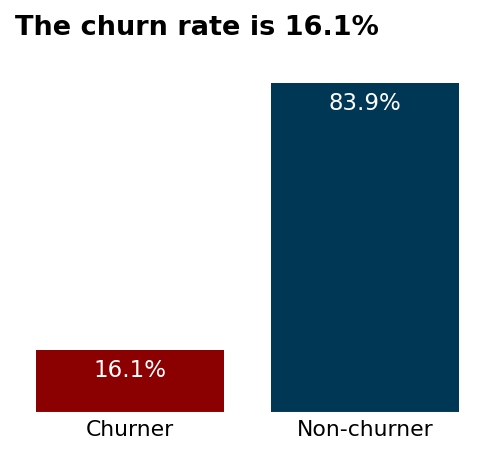

In [52]:
# Define the plot.
fig, ax = plt.subplots(figsize=(4, 3))

# Plot the barplot.
bars = ax.bar(x=churn_grp['churn_flag'], height=churn_grp['pct'], color=['#8B0000', '#003755'])
        
# Customize the plot.
ax.set_title('The churn rate is 16.1%', fontweight='bold', fontsize=13, pad=15, loc='left')
ax.set_xlabel('')
ax.set_xticks(ticks=range(2), labels=['Non-churner', 'Churner'], fontsize=10.5)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.invert_xaxis()
        
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.1f}%'.format(height), 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, -10),  
                textcoords="offset points",
                ha='center', va='center',
                fontsize=11, color='white')
    
# plt.savefig('churn_rate.png')

The target is imbalanced. 16.1% of the customers are churners. Thus, I will adopt some strategies in order to deal with this. They are:


- Stratified hold-out and k-fold cross validation in order to maintain the target proportion on test and validation sets, even for hyperparameter tuning.

- Define different class weights for majority and minority class instances. The idea is to define higher weights to minority class, such that the model will be penalized when mistakenly classifying a churner customer. These weights are defined on the model specific hyperparameter for it.


- Take a look at precision-recall trade-off if necessary. The main objective here is to predict churn probabilities, not a binary prediction. This will enable the bank to make better informed decisions. Instead of simply assessing if a client will attrit or not, it can check how likely he is to skip the service.

## Numerical features distributions

I will look at numerical features distributions below in order to see if there are skewed distributions and which are the most common values for the bank's customers numeric attributes.

In [53]:
numplots_features = ['customer_age', 
                     'months_on_book', 
                     'credit_limit', 
                     'total_revolving_bal', 
                     'avg_open_to_buy', 
                     'total_amt_chng_q4_q1', 
                     'total_trans_amt', 
                     'total_trans_ct', 
                     'total_ct_chng_q4_q1', 
                     'avg_utilization_ratio',
                     'total_relationship_count']

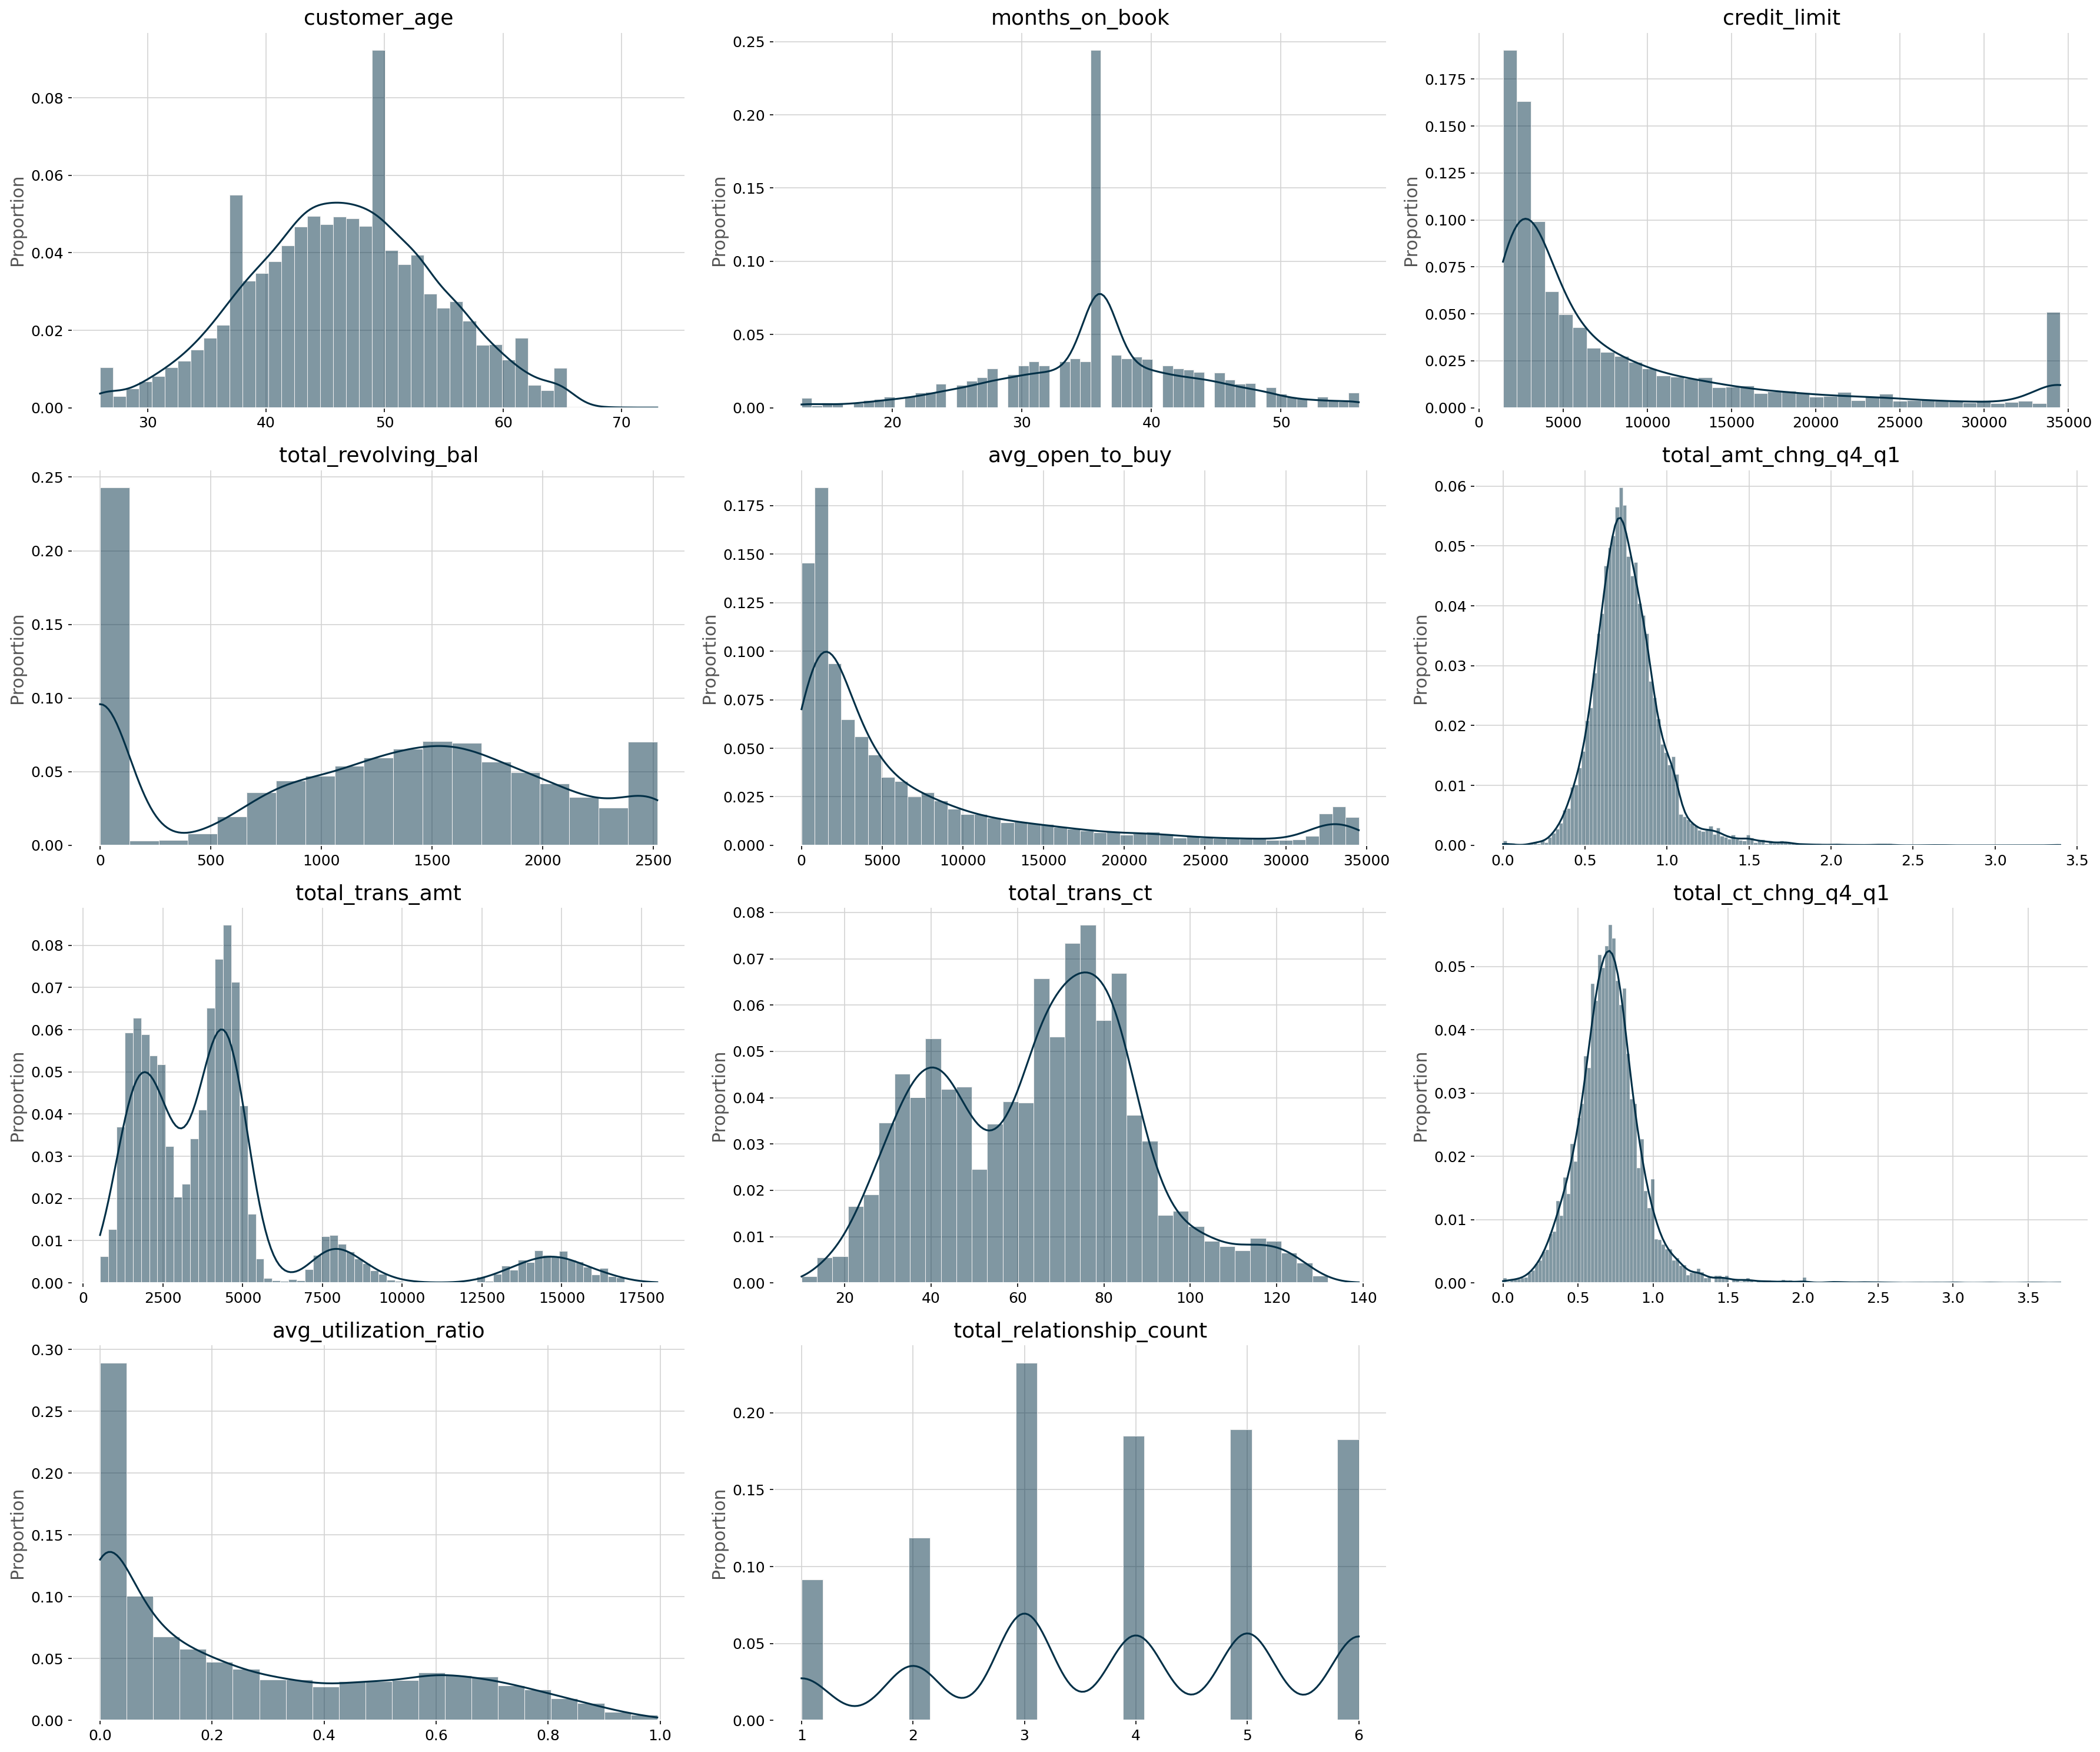

In [55]:
analysis_plots(data=train, features=numplots_features, kde=True, figsize=(24, 20))

Insights:

- Most of the customers are between 40 and 50 years old.
  
- A large part of the customers spent 36 months consuming the bank's credit card services.

- The credit limit is right-skewed. This means that the majority of customers have low credit limits, while there are relatively few customers with high credit limits. However, it is possible to see that a significant portion of them, about 5%, has a high credit limit, around 35,000. Moreover, both avg_open_to_buy and avg_utilization_ratio are also positively skewed.

- The bank must be alert to the distribution of the average utilization ratio. Being right-skewed means that most customers have a low utilization of the service. Particularly, a large part of them, about 25%, present zero utilization ratio. Therefore, the company must plan strategies to increase utilization and, consequently, revenue.

- A large portion of the customers, also about 25%, have a zero total revolving balance. Lower total revolving balances (specially zero) might indicate a significant likelihood of churn. Considering average utilization ratio and total revolving balance present the same proportion of zero records, these variables might be correlated. I will investigate this further in the analysis.

- Total transaction count and amount distributions seem to have two peaks. There must be a distinction in these distributions with respect to churn flag, which I will investigate further in the analysis. Moreover, a large part of the customers made around 80 or 40 transactions in the last 12 months. Transaction amounts about 5,000 and 2,500 were common.

- About 80% of the customers held at least 3 products of the bank.

# Outliers

In [48]:
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=train, features=numplots_features)

There are 3344 outliers in the dataset.

Number (percentage) of outliers per feature: 

customer_age: 2 (0.02)%
months_on_book: 450 (5.55)%
credit_limit: 784 (9.68)%
total_revolving_bal: 0 (0.0)%
avg_open_to_buy: 775 (9.57)%
total_amt_chng_q4_q1: 311 (3.84)%
total_trans_amt: 704 (8.69)%
total_trans_ct: 1 (0.01)%
total_ct_chng_q4_q1: 317 (3.91)%
avg_utilization_ratio: 0 (0.0)%
total_relationship_count: 0 (0.0)%


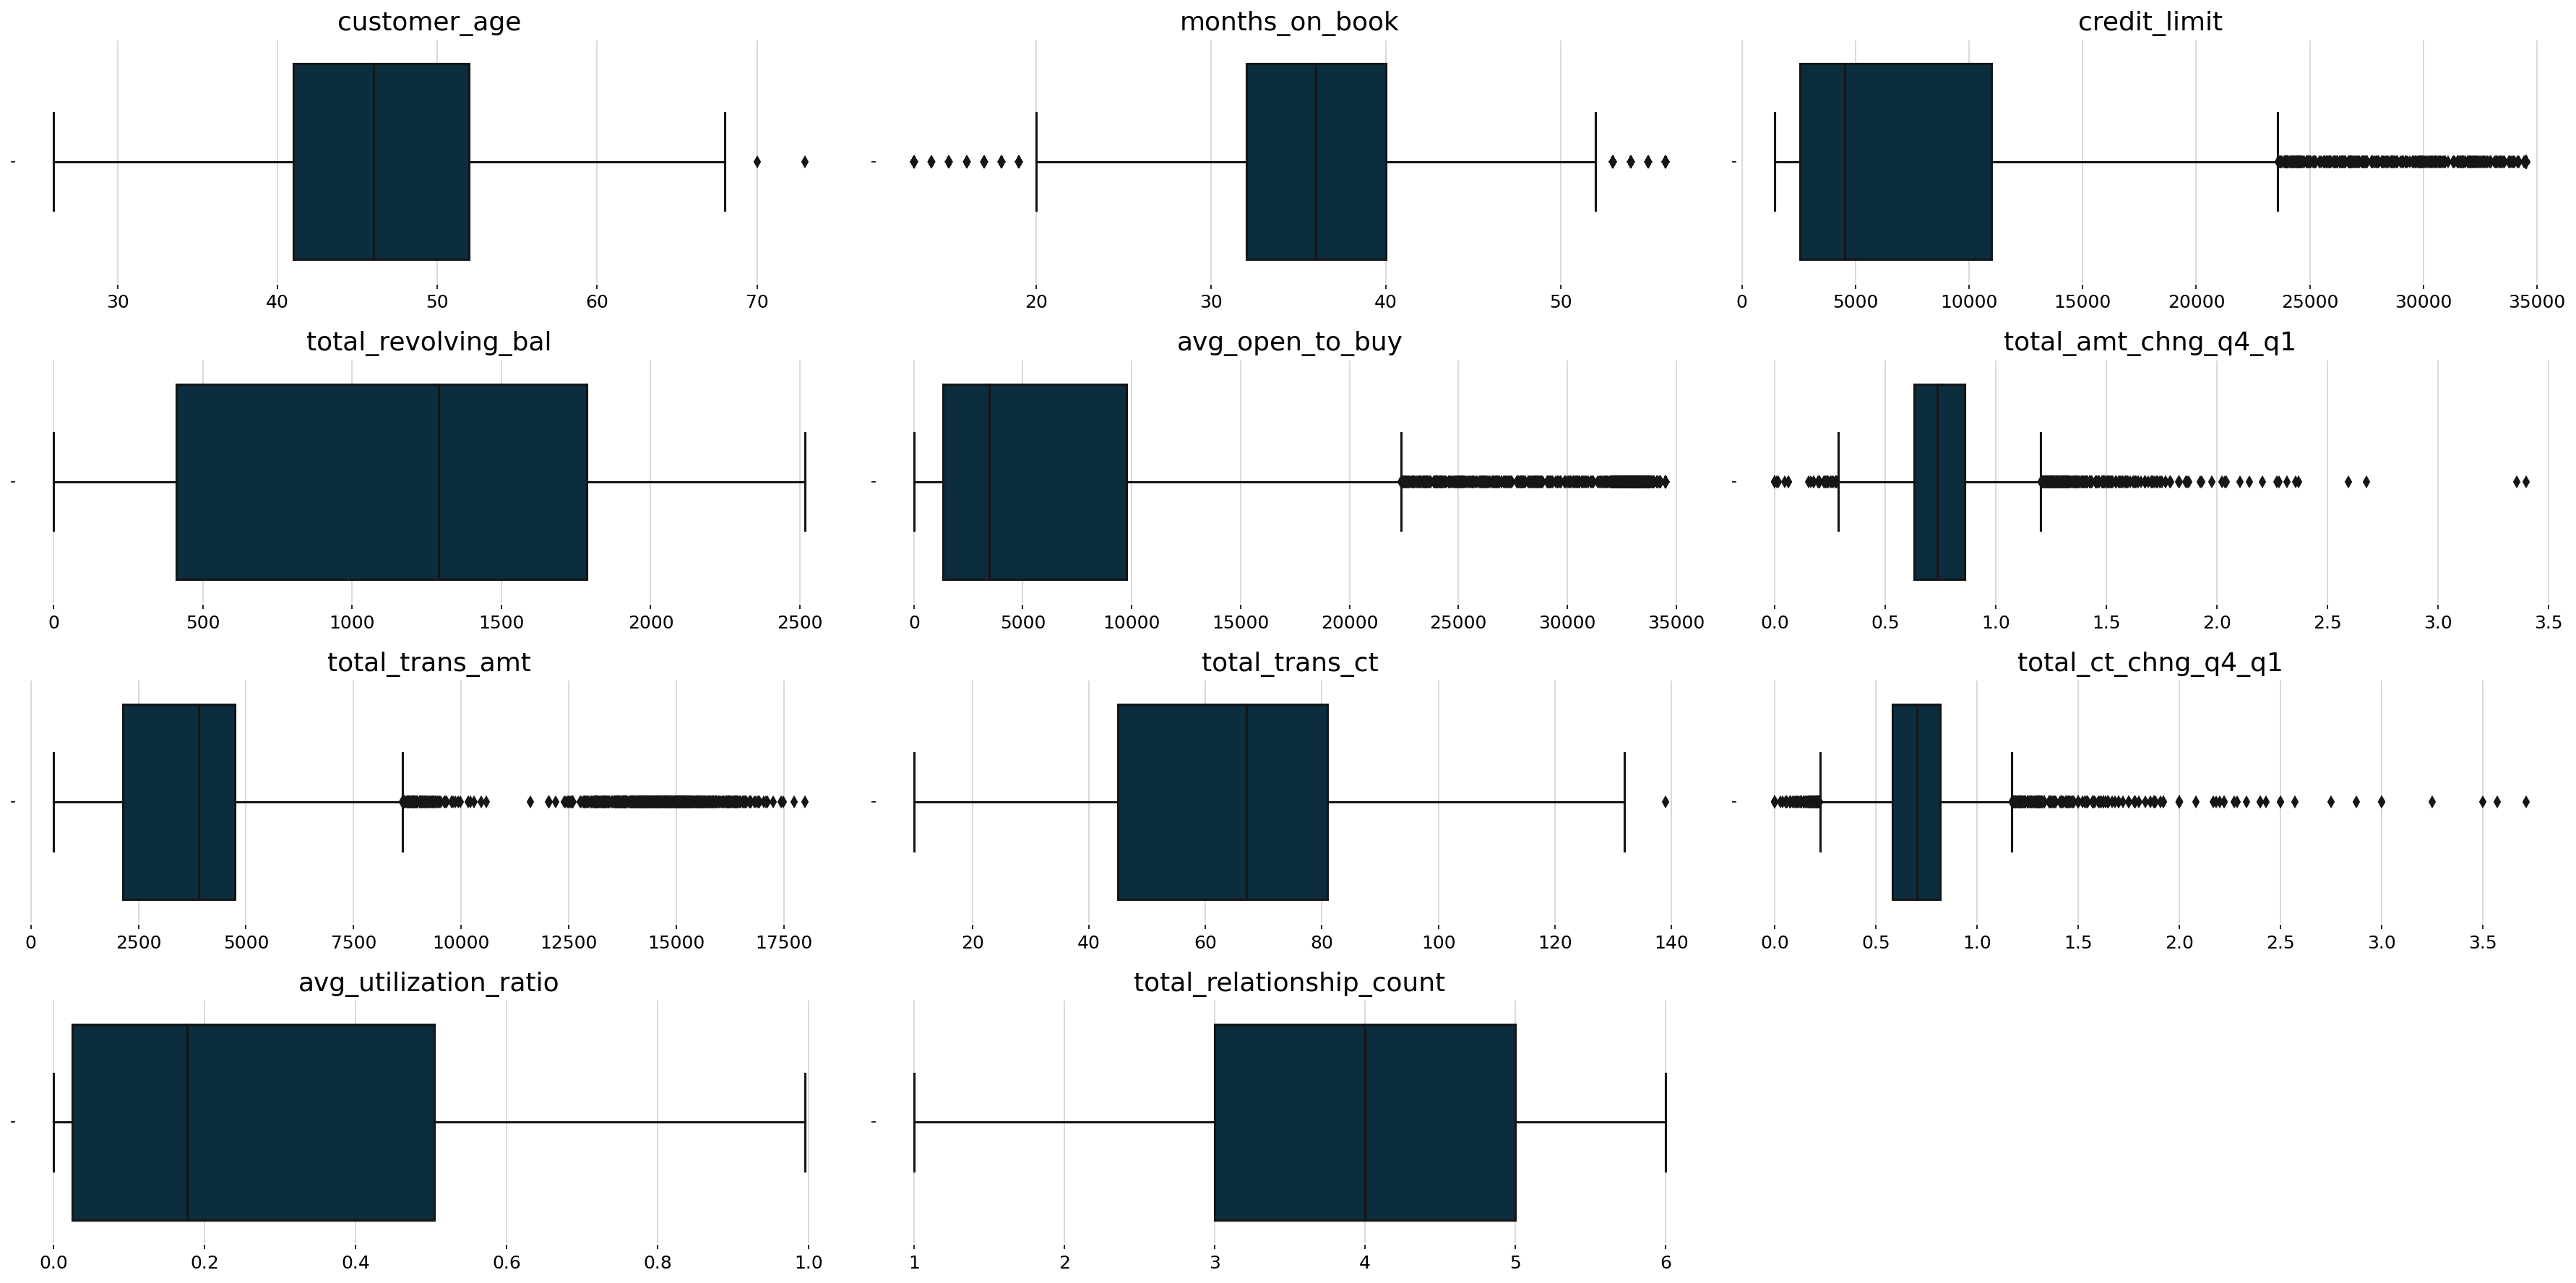

In [49]:
analysis_plots(data=train, features=numplots_features, outliers=True)